
# Project: Investigate a Dataset (No-showappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

In [25]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.duplicated ().any()

False

In [15]:
df.AppointmentDay= pd.to_datetime(df.AppointmentDay)    
df.Scholarship       = pd.to_datetime(df.Scholarship       )  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null datetime64[ns]
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(4)
memory usage: 11.8+ MB



### Data Cleaning (Replace this with more specific notes!)

In [16]:
df.drop(['AppointmentDay', 'ScheduledDay'    ], axis=1, inplace= True)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,1970-01-01,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,1970-01-01,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,1970-01-01,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,1970-01-01,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,1970-01-01,1,1,0,0,0,No


In [23]:
df= df.rename(columns={'No-show':'Noshow'})
df.head()
df['Noshow'].value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

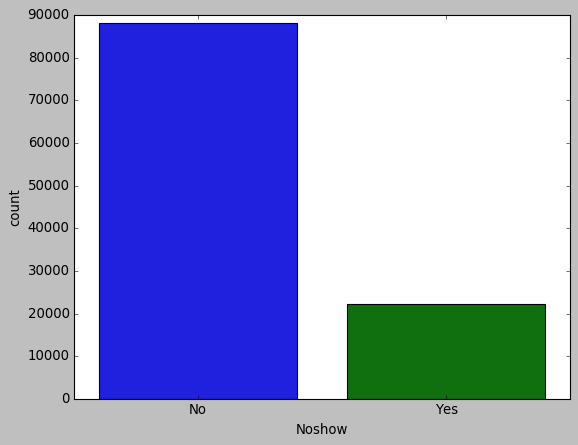

In [31]:
plt.style.use('classic')
sns.countplot(x=df.Noshow)
plt.show

## Exploratory Data Analysis


### Research Question 1 (Gender have effect on attendance )

In [34]:
print(df.Gender.unique() )
df['Gender'].value_counts()

['F' 'M']


F    71840
M    38687
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

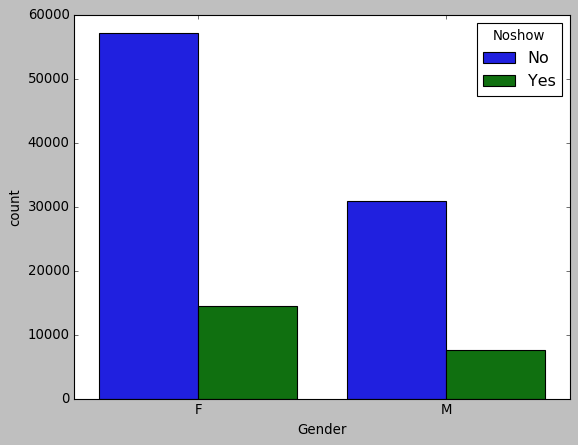

In [36]:
plt.style.use('classic')
sns.countplot(x=df.Gender, hue=df.Noshow)

plt.show

### Research Question 2  (Age has effect?)

In [37]:
print(df.Age.unique() )

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [39]:
df[df.Age==-1].shape[0]

1

In [41]:
df= df[df.Age>=0]

<function matplotlib.pyplot.show(*args, **kw)>

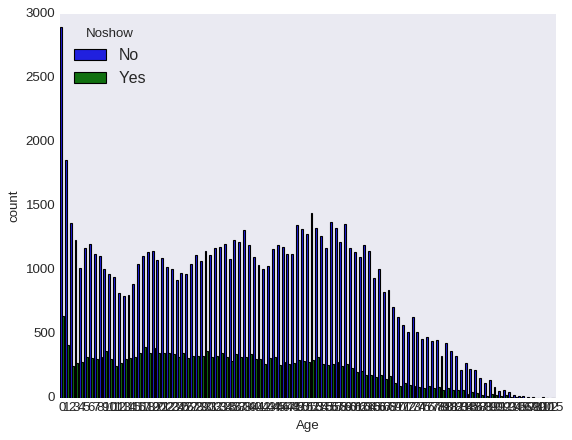

In [54]:
plt.style.use('seaborn-dark')
sns.countplot(x=df.Age, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

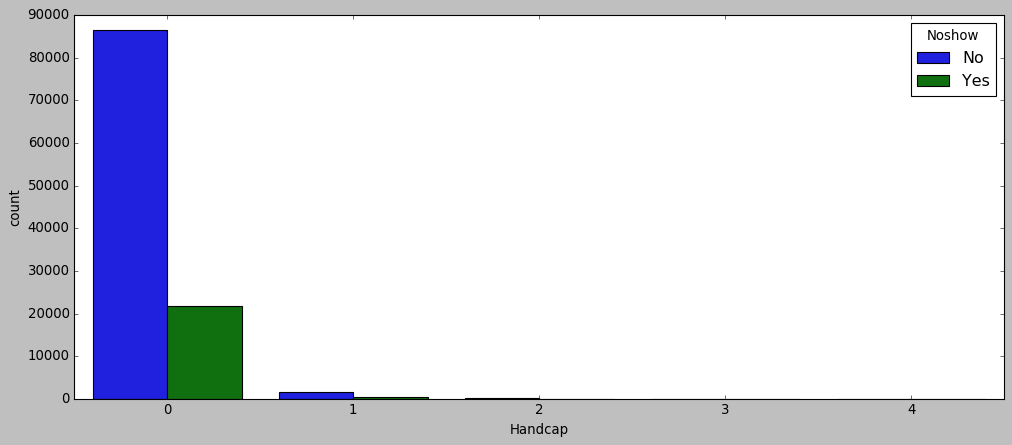

In [53]:
plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.countplot(x=df.Handcap, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

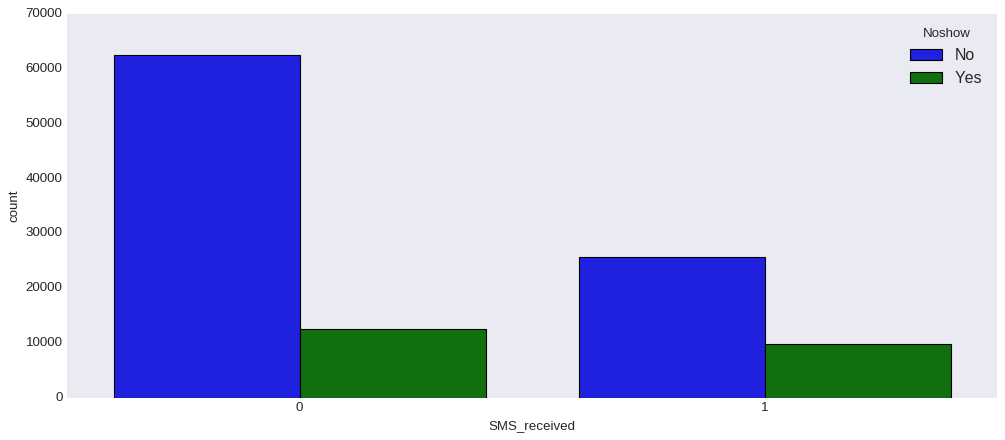

In [55]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-dark')
sns.countplot(x=df.SMS_received, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

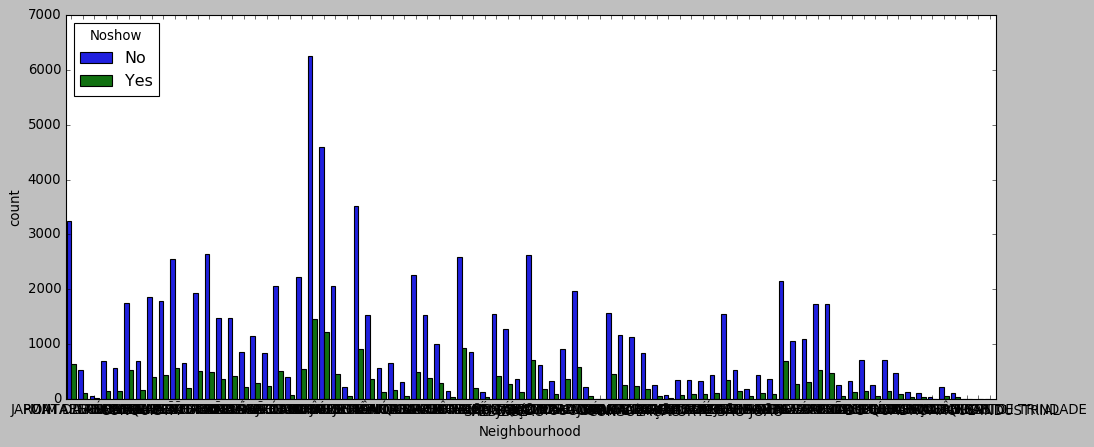

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.countplot(x=df.Neighbourhood, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

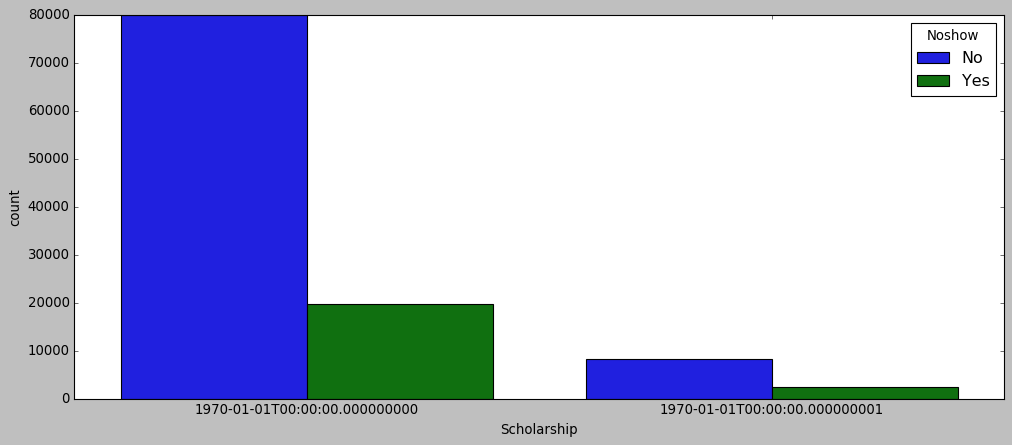

In [48]:
plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.countplot(x=df.Scholarship, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

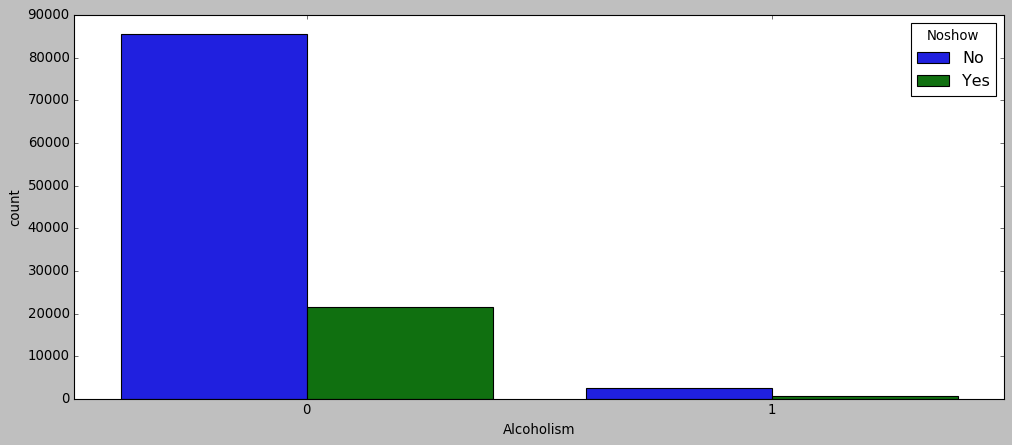

In [51]:
plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.countplot(x=df.Alcoholism, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

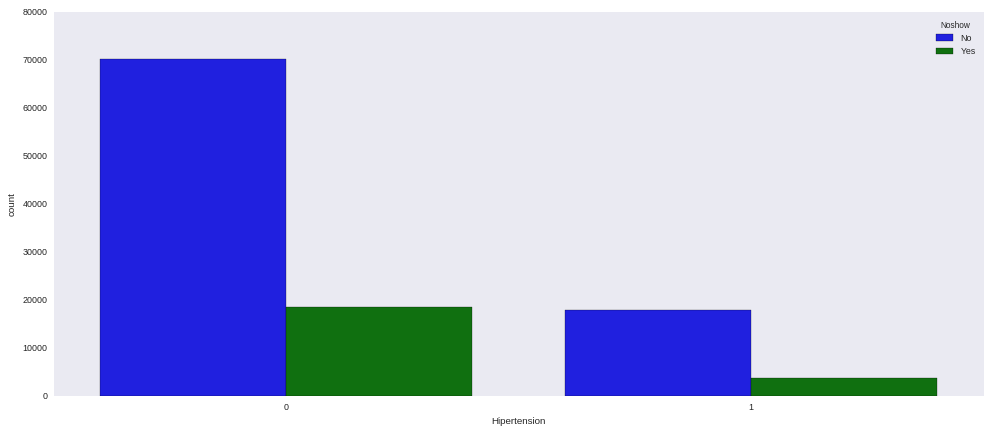

In [56]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-paper')
sns.countplot(x=df.Hipertension, hue=df.Noshow)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

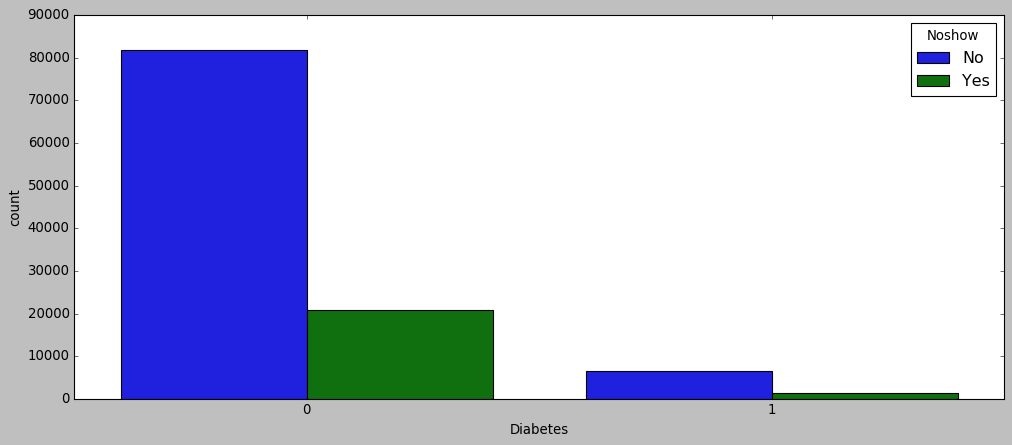

In [50]:

plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.countplot(x=df.Diabetes, hue=df.Noshow)
plt.show

<a id='conclusions'></a>
## Conclusions



in the end, Neighbourhood has related of the pattern be in clinic

most age between 0-10 then age between 35-70

many of pepole don't receved there SMS

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0